[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/piyushmobiusdtaas/UI_Element_Classifier/blob/main/UI_Component_detection.ipynb)

#### Figma API JSON download

In [ ]:
import requests
import json
import os
import re
# Figma personal access token
FIGMA_TOKEN = input('Pleae Insert Figma token:').strip()


figma_url = input("🔗 Enter Figma URL: ").strip()

# Extract file key from either /file/ or /design/
match = re.search(r"/(file|design)/([a-zA-Z0-9]+)", figma_url)
if not match:
    print("Invalid Figma URL.")
    exit()

FILE_KEY = match.group(2)

# API endpoints
FILE_URL = f"https://api.figma.com/v1/files/{FILE_KEY}"
IMAGE_URL = f"https://api.figma.com/v1/images/{FILE_KEY}"

headers = {
    "X-Figma-Token": FIGMA_TOKEN
}

# Fetch Figma file
response = requests.get(FILE_URL, headers=headers)
if response.status_code != 200:
    print("Error fetching Figma data:", response.status_code, response.text)
    exit()

data = response.json()
document = data["document"]

# Find the first FRAME node ID
first_frame_id = None
first_frame_name = None

def find_first_frame(node):
    global first_frame_id, first_frame_name
    if first_frame_id:
        return
    if node.get("type") == "FRAME":
        first_frame_id = node.get("id")
        first_frame_name = node.get("name")
        return
    for child in node.get("children", []):
        find_first_frame(child)

find_first_frame(document)

# Ensure output directories exist
figma_dir = '/content/Figma'
input_dir = '/content/Inputs'
os.makedirs(figma_dir, exist_ok=True)
os.makedirs(input_dir, exist_ok=True)

# Save raw Figma JSON
json_path = os.path.join(figma_dir, 'figma_data.json')
with open(json_path, 'w') as f:
    json.dump(data, f, indent=2)
print(f"Figma JSON saved to {json_path}")

# Request image URL for the first frame
if not first_frame_id:
    print("No FRAME found in the Figma file.")
    exit()

params = {
    "ids": first_frame_id,
    "format": "png",
    "scale": "2"
}
image_response = requests.get(IMAGE_URL, headers=headers, params=params)
if image_response.status_code != 200:
    print("Error fetching image URL:", image_response.status_code, image_response.text)
    exit()

image_url = image_response.json().get("images", {}).get(first_frame_id)
if not image_url:
    print("No image URL returned for the first frame.")
    exit()

# Save image to /content/Input/
image_path = os.path.join(input_dir, "input.png")

image_data = requests.get(image_url).content
with open(image_path, "wb") as f:
    f.write(image_data)
print(f" Image saved: {image_path}")

Pleae Insert Figma token:figd_8ZUC6VCeed6GeDKcLX1-AhvTndBdCUuoB56BZAUl
🔗 Enter Figma URL: https://www.figma.com/design/ctQvDfzNPvdmKMruo12tcI/Reusable--Responsive---Interactive-Form--Community-?node-id=45-623&t=eLjQRliCiPzMYhdT-0
✅ Figma JSON saved to /content/Figma/figma_data.json
✅ Image saved: /content/Inputs/input.png


#### Ollama and qwin installation

In [ ]:
! sudo apt update && sudo apt install pciutils lshw

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,801 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,587 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh



>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
!nohup ollama serve > ollama.log 2>&1 &

In [ ]:
! ollama run qwen2.5vl:32b hi

Error: ollama server not responding - could not connect to ollama server, run 'ollama serve' to start it


In [ ]:
! pip install ollama

In [ ]:
!ollama list


NAME             ID              SIZE     MODIFIED      
qwen2.5vl:32b    3edc3a52fe98    21 GB    5 minutes ago    


#### Omniparser running


In [ ]:
!git clone https://github.com/Kumarswami22/OmniParser.git
%cd OmniParser


Cloning into 'OmniParser'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 99 (delta 1), reused 99 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (99/99), 18.95 MiB | 15.83 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/OmniParser


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py)

In [ ]:
# !pip install gradio==4.44.0, transformers==4.49.0, pydantic==2.10.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 14.2
    Uninstalling websockets-14.2:
      Successfully uninstalled websockets-14.2
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.3
    Uninstalling tomlkit-0.13.3:
      Successfully uninstalled tomlkit-0.13.3
  Attempting uninstall: pydantic-core


In [ ]:
!for f in icon_detect/{train_args.yaml,model.pt,model.yaml} icon_caption/{config.json,generation_config.json,model.safetensors}; do huggingface-cli download microsoft/OmniParser-v2.0 "$f" --local-dir weights; done
!mv weights/icon_caption weights/icon_caption_florence

train_args.yaml: 1.69kB [00:00, 8.66MB/s]
Download complete. Moving file to weights/icon_detect/train_args.yaml
weights/icon_detect/train_args.yaml
model.pt: 100% 40.6M/40.6M [00:00<00:00, 278MB/s]
Download complete. Moving file to weights/icon_detect/model.pt
weights/icon_detect/model.pt
model.yaml: 1.14kB [00:00, 6.73MB/s]
Download complete. Moving file to weights/icon_detect/model.yaml
weights/icon_detect/model.yaml
config.json: 5.75kB [00:00, 22.4MB/s]
Download complete. Moving file to weights/icon_caption/config.json
weights/icon_caption/config.json
generation_config.json: 100% 292/292 [00:00<00:00, 2.70MB/s]
Download complete. Moving file to weights/icon_caption/generation_config.json
weights/icon_caption/generation_config.json
model.safetensors: 100% 1.08G/1.08G [00:02<00:00, 404MB/s]
Download complete. Moving file to weights/icon_caption/model.safetensors
weights/icon_caption/model.safetensors


In [ ]:
!python /content/OmniParser/gradio_demo.py /content/Inputs/input.png


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
[2025-06-28 12:30:43,227] [ WARNING] easyocr.py:251 - Downloading detection model, please wait. This may take several minutes depending upon your network connection.
Progress: |██████████████████████████████████████████████████| 100.0% Complete[2025-06-28 12:30:47,464] [ WARNING] easyocr.py:176 - Downloading recognition model, please wait. This may take several minutes depending upon your network connection.
Progress: |██████████████████████████████████████████████████| 100.0% Completedownload https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar
100% 3910/3910 [00:00<00

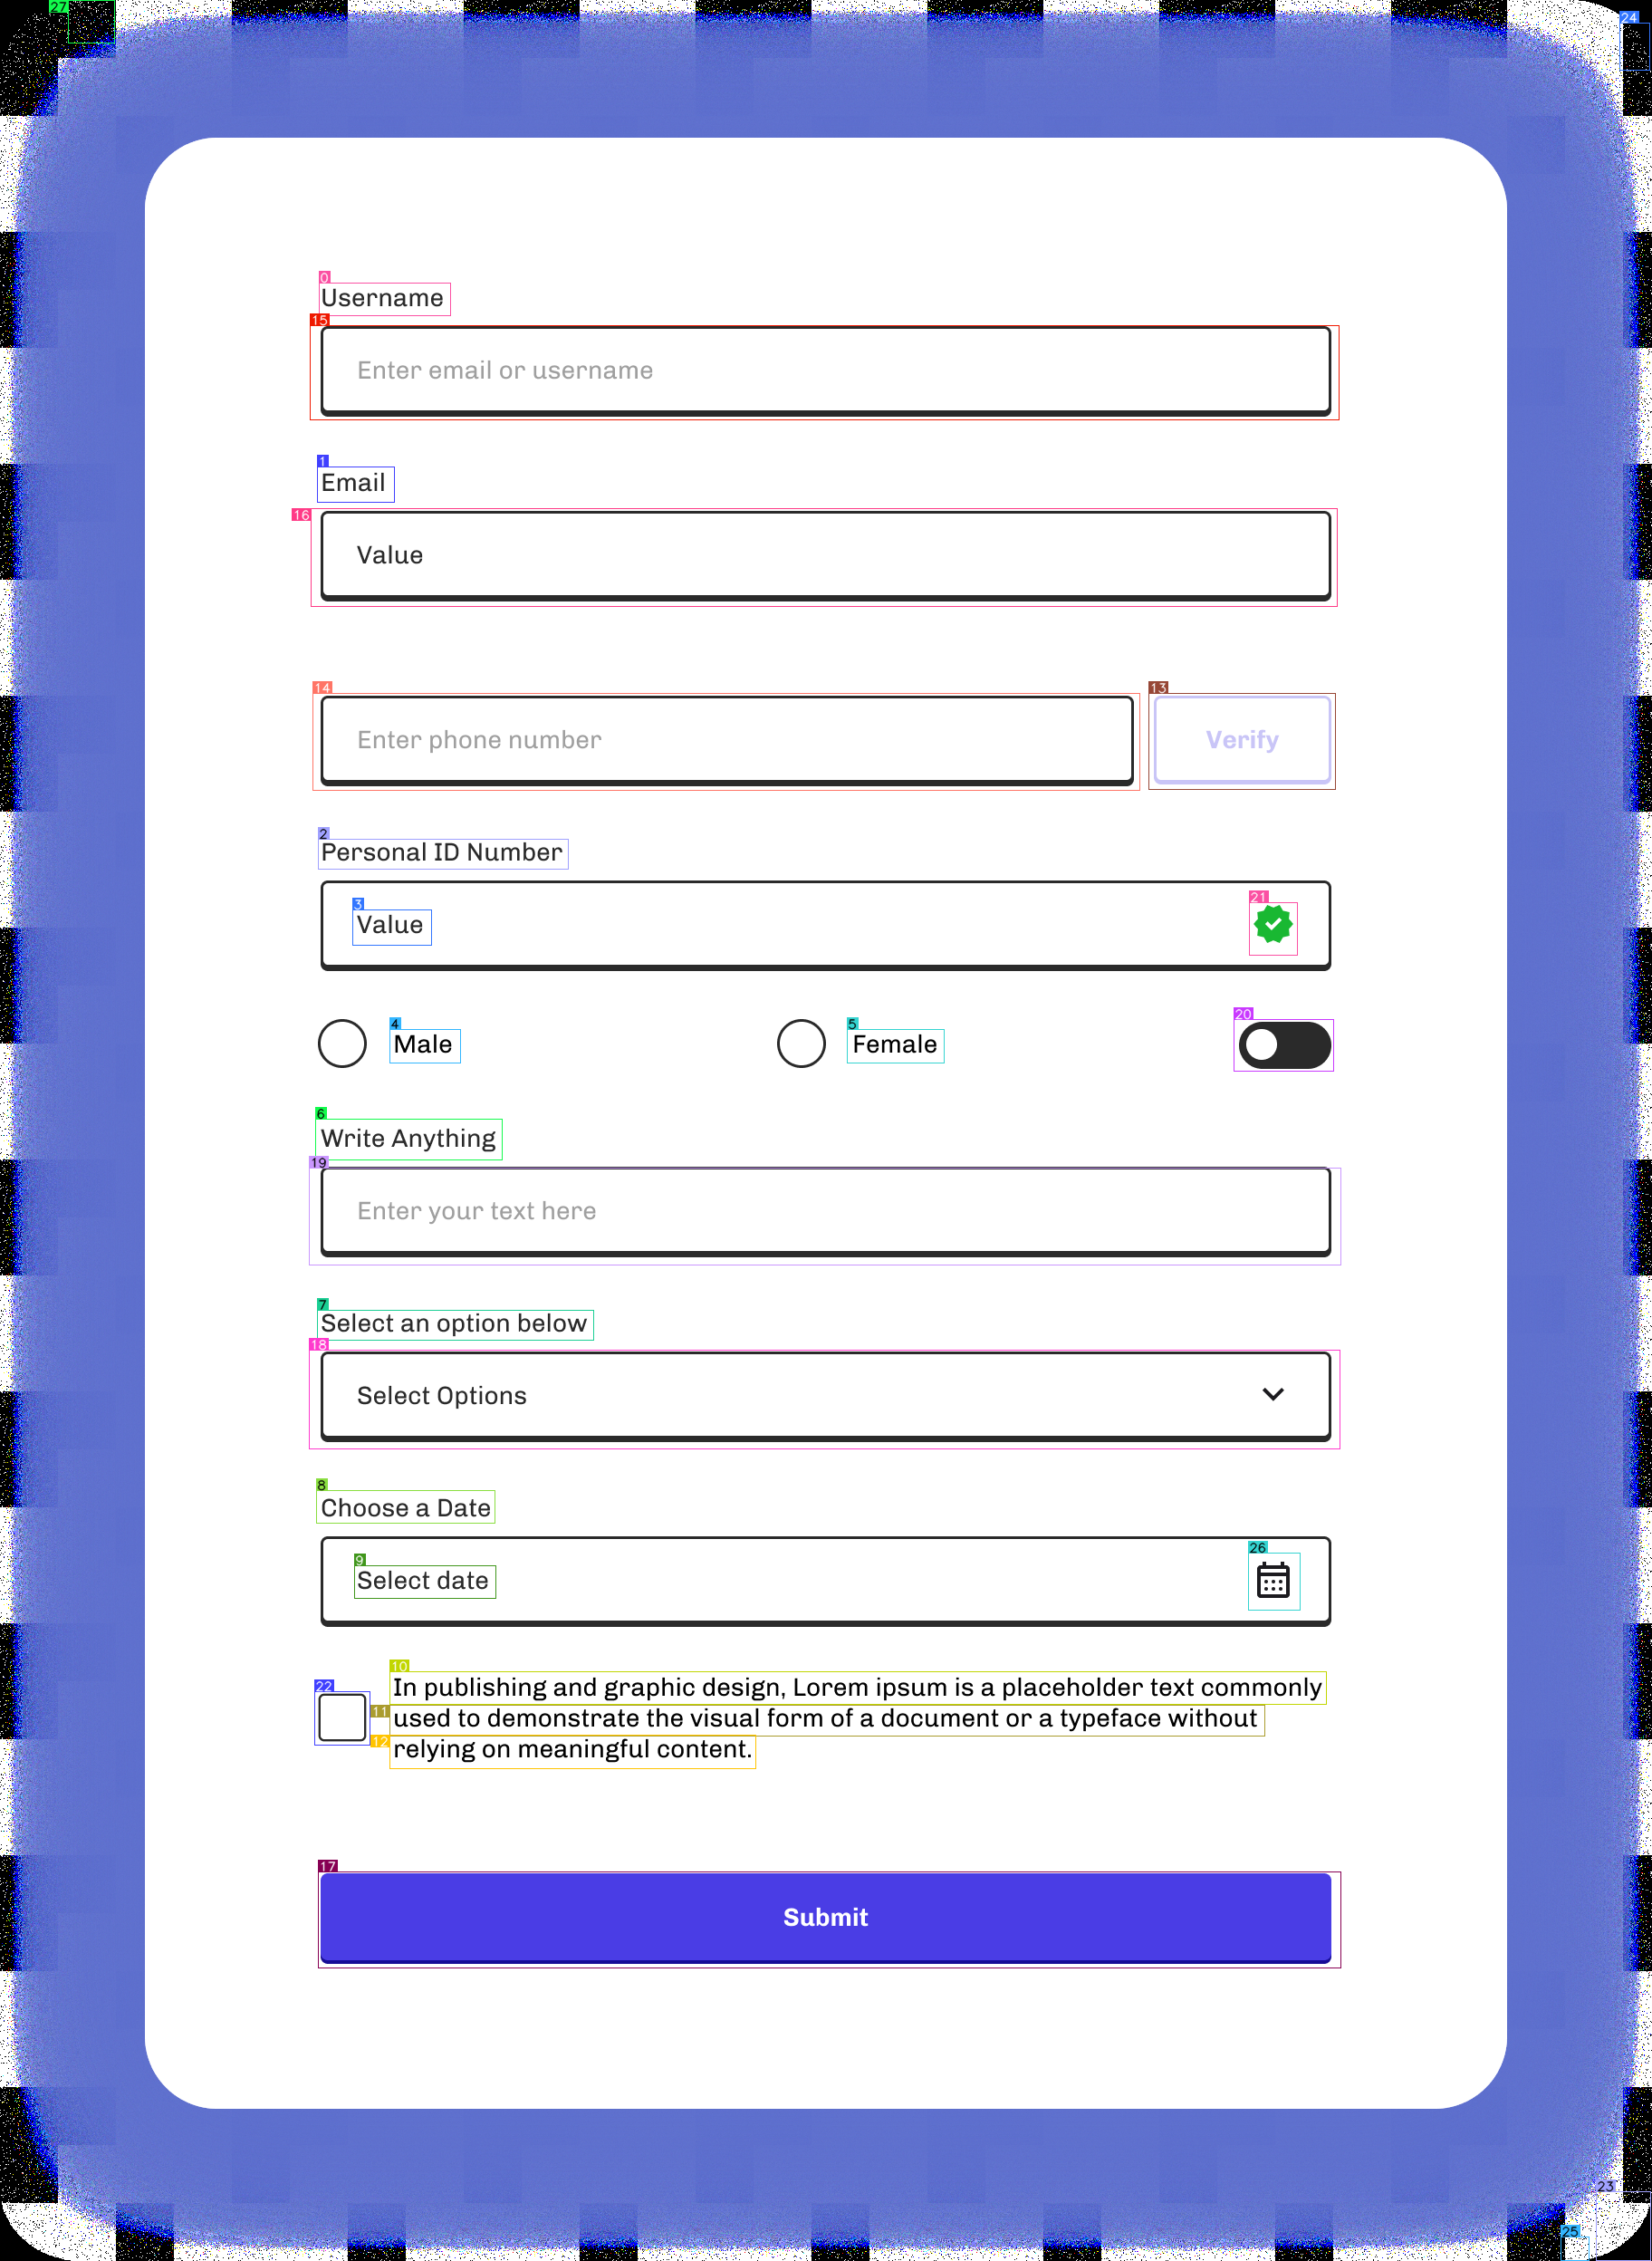

In [ ]:
from PIL import Image
Image.open("/content/Omniparser output/Omniparser output.png")

# with open("/content/Omniparser output/json data from omniparser.txt") as f:
#    print(f.read())

#### Qwen model

Running gemma/Qwen

In [ ]:
import json
import ollama
import os

# === Paths ===
image_path = "/content/Omniparser output/Omniparser output.png"
json_path = "/content/Omniparser output/data from omniparser.json"
output_path = "/content/Gemma output/gemma output.json"

# === Ensure output directory exists ===
os.makedirs(os.path.dirname(output_path), exist_ok=True)

import json

def load_and_format_data(file_path):
    """
    Loads a JSON file and formats its data into the specified 'your_data' format.

    Args:
        file_path (str): The path to the JSON file.

    Returns:
        list: A list of dictionaries, where each dictionary represents an item
              with 'id', 'type', and 'content' keys.
    """
    with open(file_path, 'r') as f:
        raw_data = json.load(f)

    your_data = []
    for item in raw_data:
        your_data.append({
            'id': item['icon'],
            'type': item['type'],
            'content': item['content'].strip(),
        })
    return your_data

# Example usage:
your_data = load_and_format_data(json_path)
print(your_data)


# === Load JSON and convert to readable element format ===
# def format_json_as_prompt(json_file):
#     with open(json_file, "r") as f:
#         data = json.load(f)


#     your_data = [
#     {
#         'id': icon_id,
#         'type': details['type'],
#         'content': details['content'].strip()
#     }
#     for icon_id, details in data.items()
# ]
#     return your_data

#     # formatted = ""
#     # for item in data:
#     #     icon = item["icon"]
#     #     element = {k: v for k, v in item.items() if k != "icon"}
#     #     formatted += f"icon {icon}: {element}\n"
#     # return formatted

# # === Embed into prompt ===
# your_data_json = format_json_as_prompt(json_path)


import base64
import ollama

# Step 1: Load and base64-encode the image
with open(image_path, "rb") as image_file:
    image_bytes = image_file.read()
    image_b64 = base64.b64encode(image_bytes).decode("utf-8")

# Step 2: Prepare the prompt as a single string
prompt = f"""
You are a vision-based UI component classification assistant.

You are given:
1. A UI screenshot annotated by OmniParser.
2. A list of UI elements, each with:
   - id
   - type ("text" or "icon")
   - content (text shown inside or nearby)

Your goal is to classify each UI element into the correct interactive component class based strictly on visual layout and appearance, not just textual content.

Use one of the following classes:
- "label"
- "text box"
- "multiline text box"
- "button"
- "radio button"
- "checked checkbox"
- "unchecked checkbox"
- "toggle"
- "dropdown"
- "calendar icon"
- "icon"
- "paragraph"

Classification Guidelines:
- Use visual features like shape (e.g., circular for radio buttons, square for checkboxes), alignment, proximity to other elements, and interactive hints (like filled circles or borders).
- If two or more elements are aligned horizontally or vertically with circular indicators, and contain options like "Male", "Female", etc., they are likely radio buttons — even if their content is text.
- Do not rely only on content like “Male” or “Female.” Always look at the visual indicators (circle, dot inside, etc.).
- Labels usually appear adjacent to interactive components without their own shapes.
- Grouping and visual hierarchy are important to distinguish between labels and radio/checkbox options.
- Make sure you classify all elements from the image

Return the result as a list of JSON objects:
[
  {{
    "id": "<id>",
    "type": "<type>",
    "content": "<content>",
    "class": "<predicted_class>"
  }}
]

Here is the element data:
{your_data}
"""
# Step 3: Call the Ollama model
response = ollama.chat(
    model='qwen2.5vl:32b',
    messages=[
        {
            "role": "user",
            "content": prompt,
            "images": [image_b64]  # <-- this is the correct way to send image
        }
    ]
)

# Step 4: Print the result
print(response['message']['content'])

#save model respone in json file
import json
import re

# --- Your variables ---
response_text = response['message']['content']  # Replace with your actual model response

# --- Extract JSON from response ---
try:
    json_text = re.search(r'\[\s*{.*?}\s*]', response_text, re.DOTALL).group()
    parsed_data = json.loads(json_text)
except Exception as e:
    print("Error extracting JSON:", e)
    parsed_data = []

# --- Save to specified output path ---
if parsed_data:
    with open(output_path, "w") as f:
        f.write(json.dumps(parsed_data, indent=2))
    print(f"Saved successfully to: {output_path}")
else:
    print("No valid JSON found to save.")




[{'id': 0, 'type': 'text', 'content': 'Username'}, {'id': 1, 'type': 'text', 'content': 'Email'}, {'id': 2, 'type': 'text', 'content': 'Personal ID Number'}, {'id': 3, 'type': 'text', 'content': 'Value'}, {'id': 4, 'type': 'text', 'content': 'Male'}, {'id': 5, 'type': 'text', 'content': 'Female'}, {'id': 6, 'type': 'text', 'content': 'Write Anything'}, {'id': 7, 'type': 'text', 'content': 'Select an option below.'}, {'id': 8, 'type': 'text', 'content': 'Choose a Date'}, {'id': 9, 'type': 'text', 'content': 'Select date'}, {'id': 10, 'type': 'text', 'content': 'In publishing and graphic design, Lorem ipsum is a placeholder text commonly'}, {'id': 11, 'type': 'text', 'content': 'used to demonstrate the visual form of a document or a typeface without'}, {'id': 12, 'type': 'text', 'content': 'relying on meaningful content..'}, {'id': 13, 'type': 'icon', 'content': 'Verify'}, {'id': 14, 'type': 'icon', 'content': 'Enter phone number'}, {'id': 15, 'type': 'icon', 'content': 'Enter email or u

**Create combined json by mapping class.**

In [ ]:
import json

def merge_json_data(omniparser_file, gemma_file, output_file):
    """
    Merges 'class' information from gemma_file into omniparser_file
    and saves the result to output_file.

    Args:
        omniparser_file (str): Path to the JSON file from omniparser.
        gemma_file (str): Path to the JSON file from gemma output.
        output_file (str): Path where the merged JSON data will be saved.
    """
    try:
        with open(omniparser_file, 'r') as f:
            omniparser_data = json.load(f)
    except FileNotFoundError:
        print(f"Error: {omniparser_file} not found.")
        return
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from {omniparser_file}.")
        return

    try:
        with open(gemma_file, 'r') as f:
            gemma_data = json.load(f)
    except FileNotFoundError:
        print(f"Error: {gemma_file} not found.")
        return
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from {gemma_file}.")
        return

    # Create a dictionary for quick lookup of classes by id from gemma_data
    gemma_class_map = {item['id']: item['class'] for item in gemma_data}

    # Iterate through omniparser_data and add the 'class'
    for item in omniparser_data:
        item_id = item.get('icon')  # Assuming 'icon' in omniparser corresponds to 'id' in gemma
        if item_id is not None and item_id in gemma_class_map:
            item['class'] = gemma_class_map[item_id]
        else:
            item['class'] = "unknown" # Assign a default or handle missing classes as needed

    # Save the updated data to a new JSON file
    try:
        with open(output_file, 'w') as f:
            json.dump(omniparser_data, f, indent=2)
        print(f"Merged data saved successfully to {output_file}")
    except IOError:
        print(f"Error: Could not write to {output_file}.")

# Define your file names
omniparser_json_file = '/content/Omniparser output/data from omniparser.json'
gemma_json_file = '/content/Gemma output/gemma output.json'
output_json_file = '/content/Gemma output/merged_output.json' # New file to save the merged data

# Run the merge function
merge_json_data(omniparser_json_file, gemma_json_file, output_json_file)

Merged data saved successfully to /content/Gemma output/merged_output.json


qwen ouput visualisation

Saved image at: /content/Gemma output/gemma output visualised.jpg


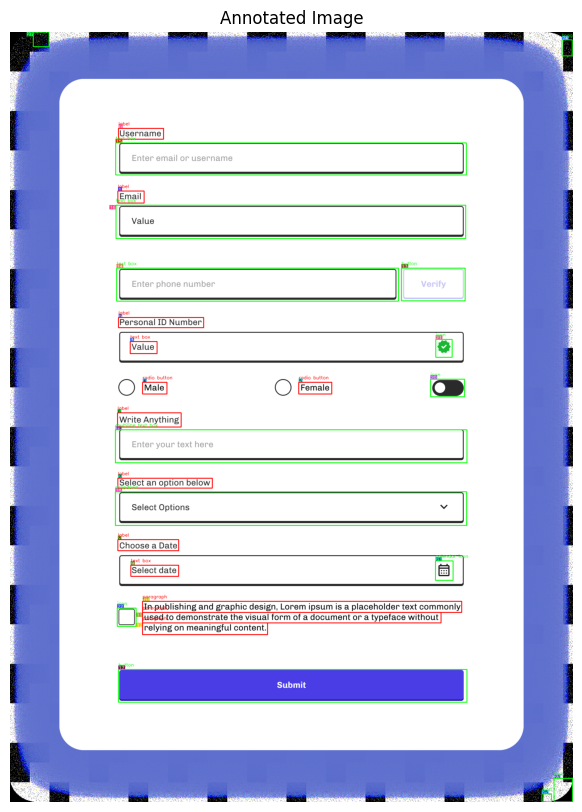

In [ ]:
import cv2
import matplotlib.pyplot as plt
import json
from PIL import Image
import numpy as np

# Load image
image_path = '/content/Omniparser output/Omniparser output.png'  # change this to your image path
image = Image.open(image_path)
img = np.array(image)
height, width = img.shape[:2]


import json

with open('/content/Gemma output/merged_output.json', 'r') as f:
    data = json.load(f)

# Fix interactivity booleans if they were strings
# for item in data:
#     if "interactivity" in item:
#         if item["interactivity"] == "true":
#             item["interactivity"] = True
#         elif item["interactivity"] == "false":
#             item["interactivity"] = False

annotations = data

# Draw bounding boxes
for item in annotations:
    x_min, y_min, x_max, y_max = item['bbox']
    start_point = (int(x_min * width), int(y_min * height))
    end_point = (int(x_max * width), int(y_max * height))

    color = (0, 255, 0) if item['interactivity'] else (255, 0, 0)  # Green for interactive, Red for non-interactive
    img = cv2.rectangle(img, start_point, end_point, color, 2)

    label = item.get('class')
    img = cv2.putText(img, label, (start_point[0], start_point[1] - 10),
                      cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1, cv2.LINE_AA)

# Save output image
output_path = "/content/Gemma output/gemma output visualised.jpg"
cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))  # Convert to BGR for OpenCV
print(f"Saved image at: {output_path}")

# Display image inline (optional)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Annotated Image")
plt.show()

#### Mapping Component ID JSON

In [ ]:
# Re-run due to code execution state reset
import json
import csv
from difflib import SequenceMatcher
from pathlib import Path

# === Load Figma JSON ===
with open("/content/Figma/figma_data.json", "r") as f:
    figma_json = json.load(f)

# === Extract Frame Size ===
def get_frame_size(json_data):
    def find_first_frame(node):
        if node.get("type") == "FRAME" and "absoluteBoundingBox" in node:
            box = node["absoluteBoundingBox"]
            return box["width"], box["height"]
        for child in node.get("children", []):
            res = find_first_frame(child)
            if res:
                return res
        return None
    return find_first_frame(json_data["document"])

frame_width, frame_height = get_frame_size(figma_json)

# === Traverse Figma Components ===
def extract_components(node, collected):
    if node.get("absoluteBoundingBox"):
        content = node.get("characters", "").strip().upper() if node.get("type") == "TEXT" else node.get("name", "").strip().upper()
        collected.append({
            "id": node["id"],
            "type": node["type"],
            "content": content,
            "bbox": node["absoluteBoundingBox"]
        })
    for child in node.get("children", []):
        extract_components(child, collected)

components = []
extract_components(figma_json["document"], components)

# === Normalize BBoxes ===
def normalize_figma_box(box, frame_w, frame_h):
    x1 = box["x"] / frame_w
    y1 = box["y"] / frame_h
    x2 = (box["x"] + box["width"]) / frame_w
    y2 = (box["y"] + box["height"]) / frame_h
    return [x1, y1, x2, y2]

def iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    if boxAArea + boxBArea == 0:
        return 0.0
    return interArea / (boxAArea + boxBArea - interArea)

def text_similarity(a, b):
    return SequenceMatcher(None, a.strip().lower(), b.strip().lower()).ratio()

# === Match One Detection ===
def find_best_match(components, ml_output, frame_w, frame_h):
    best_match = None
    max_score = 0
    ml_norm_bbox = ml_output["bbox"]
    ml_content = ml_output["content"].strip().upper()

    for comp in components:
        comp_norm_bbox = normalize_figma_box(comp["bbox"], frame_w, frame_h)
        iou_score = iou(comp_norm_bbox, ml_norm_bbox)
        content_score = text_similarity(comp["content"], ml_content)
        total_score = content_score + iou_score
        if total_score > max_score:
            max_score = total_score
            best_match = comp

    return best_match, max_score

# === Load ML Detections ===
with open("/content/Gemma output/merged_output.json", "r") as f:
    ml_detections = json.load(f)
    for ml_obj in ml_detections:
        ml_obj["content"] = ml_obj["content"].strip()

# === Match All and Prepare Output ===
enriched_results = []
# csv_rows = []

for ml in ml_detections:
    match, score = find_best_match(components, ml, frame_width, frame_height)
    enriched = {
        "icon": ml["icon"],
        "bbox": ml["bbox"],
        "content": ml["content"],
        "class": ml["class"],
        "component id": match["id"] if match else "",
        # "match score": round(score, 4)
    }

    enriched_results.append(enriched)

# print(f'\n {enriched_results}')
print("\n Enriched Results (one per line):\n")
for item in enriched_results:
    print(json.dumps(item, indent=2))

# Ensure parent folder exists
# === Save JSON Output ===
final_json_path = "/content/Outputs/component_map_output.json"

# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(final_json_path), exist_ok=True)

with open(final_json_path, "w") as f:
    json.dump(final_json_path, f, indent=2)

print(f"JSON saved to {final_json_path}")




✅ Enriched Results (one per line):

{
  "icon": 0,
  "bbox": [
    0.19298245012760162,
    0.125,
    0.2724780738353729,
    0.13942307233810425
  ],
  "content": "Username",
  "class": "label",
  "component id": "I43:542;8:244;8:81"
}
{
  "icon": 1,
  "bbox": [
    0.19188596308231354,
    0.20633013546466827,
    0.23848684132099152,
    0.22195513546466827
  ],
  "content": "Email",
  "class": "label",
  "component id": "I43:543;8:273;8:81"
}
{
  "icon": 2,
  "bbox": [
    0.19298245012760162,
    0.37099358439445496,
    0.34375,
    0.38421472907066345
  ],
  "content": "Personal ID Number",
  "class": "label",
  "component id": "I43:545;18:1798;8:81"
}
{
  "icon": 3,
  "bbox": [
    0.21326754987239838,
    0.40224358439445496,
    0.2615131437778473,
    0.41786858439445496
  ],
  "content": "Value",
  "class": "text box",
  "component id": "I43:542;8:244;18:1954"
}
{
  "icon": 4,
  "bbox": [
    0.2357456088066101,
    0.45512819290161133,
    0.2785087823867798,
    0.46995

In [ ]:
!du -sh /content/* | sort -hr


1.1G	/content/weights
55M	/content/sample_data
40M	/content/OmniParser
2.0M	/content/Figma
1.6M	/content/Input
520K	/content/Omniparser output
308K	/content/Gemma output
12K	/content/Outputs
8.0K	/content/ollama.log


In [ ]:
import os
import zipfile

# List of folders/files to include
include_paths = [
    "/content/Figma",
    "/content/Inputs",
    "/content/Omniparser output",
    "/content/Gemma output",
    "/content/ollama.log",
    "/content/Outputs"
]

# Output zip path
zip_path = "/content/UI Component files.zip"

# Create the zip file
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for path in include_paths:
        if os.path.isfile(path):
            zipf.write(path, os.path.basename(path))
        else:
            for root, dirs, files in os.walk(path):
                for file in files:
                    abs_file = os.path.join(root, file)
                    rel_path = os.path.relpath(abs_file, "/content")
                    zipf.write(abs_file, rel_path)

print(f"✅ Zipped selected folders to: {zip_path}")


✅ Zipped selected folders to: /content/UI Component files.zip


In [ ]:
from google.colab import files
files.download("/content/UI Component files demo 2.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print('Hi')

Hi
